# NSD Data Loader

This script illustrates usage of the NSD Data Loader Class.
For this class to work as intended nsd_access should be installed: https://github.com/tknapen/nsd_access
Both nsd_access and the data loader expect nsd data to be available in the original folder structure.

In [3]:
from NSD_DataLoader import NSDLoader
import os.path as op 

In [4]:
nsdfolder = op.join("..", "nsd") # adjust this to point to local copy of nsd dataset

nsdl = NSDLoader(nsdfolder)

Print a summary of the locally available data. This function will only show participants for which local data is available. It does so by checking for which participants beta data folders exist in the folder structure. It will therefore not catch whether data for all sessions has been downloaded. The number of available trials is read in from the behaviour data for each participant. The function returns a dictionary with each available subject as key and as value another dictionary of the form (Session: #Trials)

In [5]:
nsdl.get_data_info(verbose=True)

subj02
40 sessions available
30000 trials available
subj01
40 sessions available
30000 trials available


{'subj02': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750},
 'subj01': {1: 750,
  2: 750,
  3: 750,
  4: 750,
  5: 750,
  6: 750,
  7: 750,
  8: 750,
  9: 750,
  10: 750,
  11: 750,
  12: 750,
  13: 750,
  14: 750,
  15: 750,
  16: 750,
  17: 750,
  18: 750,
  19: 750,
  20: 750,
  21: 750,
  22: 750,
  23: 750,
  24: 750,
  25: 750,
  26: 750,
  27: 750,
  28: 750,
  29: 750,
  30: 750,
  31: 750,
  32: 750,
  33: 750,
  34: 750,
  35: 750,
  36: 750,
  37: 750,
  38: 750,
  39: 750,
  40: 750}}

Before loading the data, split it into training and test sets. The split is computed so that stimuli should only occur either in the training or the test set. (All repetitions of the same stimulus end up in the same set). The function accepts the approximate fraction of data to be held out for testing as test_fraction. Optionally only include stimuli that were shown to all participants

In [12]:
train_stims, test_stims = nsdl.create_image_split(test_fraction=.2, shared=True)
print(train_stims.shape)
print(test_stims.shape)
print(test_stims)   # pandas dataframe containing the stimulus ids 
                    # (cocoID to retrieve captions, 73KIDs used to get images and betas)


(800, 2)
(200, 2)
       cocoId  ID73K
4835     5684   4836
25287  332574  25288
25250  332448  25251
65686  227451  65687
59631  466265  59632
...       ...    ...
4249   558788   4250
24214  328454  24215
22387   59321  22388
30601  352861  30602
51185  171374  51186

[200 rows x 2 columns]


Next, retrieve all trials in which the selected stimuli were shown, for all subjects specified.

In [14]:
trialdata_train = nsdl.trials_for_stim(['subj01', 'subj02'], train_stims)
trialdata_test = nsdl.trials_for_stim(['subj01', 'subj02'], test_stims)
trialdata_train # for subjects that completed all 30000 trials 
                # each stimulus was shown three times, for two subjects this amounts to
                # 800 * 3 * 2 = 4800 trials in the training set with shared images

,SUBJECT,SESSION,RUN,TRIAL,73KID
28,1,1,1,29,48618
55,1,1,1,56,53053
132,1,1,3,8,36577
152,1,1,3,28,57047
166,1,1,3,42,7660
...,...,...,...,...,...
29935,2,40,11,61,46137
29943,2,40,12,6,30374
29953,2,40,12,16,12496
29958,2,40,12,21,41779


Finally, compute the session index and load the data. Images can be excluded to save memory.
The session index is needed to convert from the nsd indexing scheme:
    subject, session, run, trial
To the nsd_access indexing scheme:
    subject, session, trial
(I only have the first two sessions for subjects 1+2 available locally to save space, so I filter the data. This should not be necessary with the full dataset available.)

In [17]:
train_mask = (trialdata_train["SUBJECT"].isin([1,2])) & (trialdata_train["SESSION"].isin([1,2]))
test_mask = (trialdata_test["SUBJECT"].isin([1,2])) & (trialdata_test["SESSION"].isin([1,2]))
trialdata_train = nsdl.calculate_session_index(trialdata_train[train_mask])
trialdata_test = nsdl.calculate_session_index(trialdata_test[test_mask])

train_betas, train_captions, train_imgs = nsdl.load_data(trialdata_train)
test_betas, test_captions, test_imgs = nsdl.load_data(trialdata_test)

SESSION 1
loading annotations into memory...
Done (t=1.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
SESSION 1
loading annotations into memory...
Done (t=1.23s)
creating index...
index created!
loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
SESSION 2
loading annotations into memory...
Done (t=1.18s)
creating index...
index created!
loading annotations into me

(327684, 210)
(327684, 74)
210
74
(210, 425, 425, 3)
(74, 425, 425, 3)
['Airplanes are parked on the tarmac of an airport. ', 'planes and cars sitting on an airplane tarmac', 'The tarmac is covered with rows of planes. ', 'Planes parked at the airport outside the terminal.', 'A host of airplanes parked in a waiting area of an airport.']
['A skateboarder doing tricks on the stairs at night.', 'A skateboarder performs a trick over a set of steps. ', 'A skateboarder getting some serious air with stunt over stairs', 'A skateboarder at night is in mid air over stairs.', 'A boy doing a skateboard trick over stairs.']
['A man standing next to another man near a forest.', 'A couple of men standing by a sign with frisbees.', 'Two men are standing near a sign holding discs.', 'these are two men standing next to a sign post', 'Two man standing near each other in a park.']


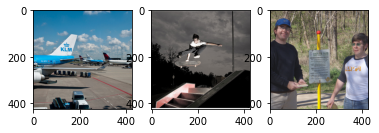

In [19]:
import matplotlib.pyplot as plt

print(train_betas.shape)
print(test_betas.shape) # dimensions of betas depend on the format selected, fsaverage is loaded here

print(len(train_captions)) # list of captions for each trial
print(len(test_captions))

print(train_imgs.shape)
print(test_imgs.shape)

trials = [42,43,44]

plt.figure()

for i in range(len(trials)):
    plt.subplot(131 + i)
    plt.imshow(train_imgs[i])
    print(train_captions[i])
plt.show()